##### Train model to predict images of digits using CLASSIC 2-Layer model and L-layer models.
- These models were built without using any TensorFlow / Pytouch.

In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import to_categorical # convert your class labels into one-hot encoded vectors,

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

In [3]:

print ("Number of training examples: " + str(train_images.shape[0]) + " images")
print ("Number of testing examples: " + str(test_images.shape[0]) + " images")
print ("Each image is of size: (" + str(train_images.shape[1]) + ", " + str(train_images.shape[1]) + ", 3)")

print("-------------------------------------")
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("test_images shape: " + str(test_images.shape))
print("test_labels shape: " + str(test_labels.shape))

Number of training examples: 60000 images
Number of testing examples: 10000 images
Each image is of size: (28, 28, 3)
-------------------------------------
train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


- In order for Dense layers to work later, we need to flatten the images (28x28) to 784-dimensional vectors for `train_images` and `test_images` so that they becomes a 2D array with shape of `(60000 , 784)` or `(10000 , 784)`

In [4]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
# Check output classes
total_classes = np.unique(train_labels)
number_of_total_classes = len(total_classes)
print('Total number of output classes : ', number_of_total_classes)
print('All Output classes : ', total_classes)

Total number of output classes :  10
All Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label : 2')

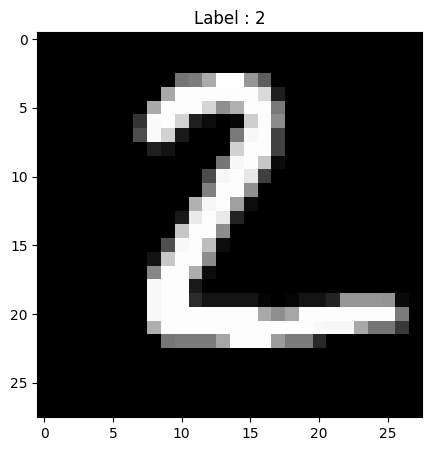

In [6]:
# Display the first image in testing data 
plt.figure(figsize=[10,5])

plt.imshow(test_images[1,:,:], cmap='gray') # shows index 1 image of size 28 x 28 pixels 
plt.title(f"Label : {test_labels[1]}")

#### Data Preprocessing: 

In [7]:
# Resahpe from an array of dimension 28x28 to array of dimention 784 so that it becomes 2D array. 
train_x = train_images.reshape(train_images.shape[0], -1) # -1 will automatically be calculated into 28 * 28
test_y = test_images.reshape(test_images.shape[0], -1)

# Standardize data to have feature values between 0 and 1. (255 is max pixel value for 8-bix grayscale image)
train_x = train_x/255.
test_x = test_y/255.

# Change to float datatype
train_data = train_x.astype('float32')
test_data = test_x.astype('float32')

print(train_x.shape)
print(test_y.shape)

(60000, 784)
(10000, 784)


In [8]:
### Another way to flatten shape:
# reshape = np.prod(train_images.shape[1:])  # = np.prod([28, 28]) = 784
# train_data = train_images.reshape(train_images.shape[0], reshape)
# test_data = test_images.reshape|(test_images.shape[0], reshape)

In [9]:
# one-hot encoded labels
train_y = to_categorical(train_labels)
test_y = to_categorical(test_labels)

- In order to let our image be idenified and classified, we need to convert numeric labels into binary vectors 
- (E.g) label `3` becomes `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.

#### Build Model: **2-Layer Model**

- It is an architecture of `LINEAR → RELU → LINEAR → SIGMOID`.

- Linear activation function `f(x)=x`: output is directly proportional to the input. (output is same as input).

- RELU (Rectified Linear Unit) `f(x)=max(0,x)`: It is a non-linear activation function that transforms any nagtive input to 0. 

- SIGMOID $f(x) = \frac{1}{1 + e^{-x}}​$: It is a non-linear activation function that output values between 0 and 1. 
    - Where if `f(x)` > 0.5 = cat (1).
    - Or if `f(x)` < 0.5 = not cat (0).

- **Required Steps:**
    - Initialize parameters
        - weight (how important a feature is) and bias (baseline).

    - Forward pass to compute activations at each layer: 
        - Linear transformation: `Z = W * A + b`.
        - Activation functions (ReLU and Sigmoid): 
            - 1st linear transformation: apply ReLU (outputs values that is always non-nagative)
            - 2nd linear transformation: apply Sigmoid (outputs probability between image digit (1) or not image digit (0))

    - Compute cost (Cross-Entropy Loss formula)
        - Formula is defined as: $- \frac{1}{m} \sum Y \log(A)$
        - Compares predicted outputs (A2) with actual labels (Y).
        - Lower cost = Model's prediction closer to actual labels =  higher accuracy.

    - Backward pass to compute gradients.
        - Uses Backpropagation (based on the Calculus Chain Rule) to calculate how much each weight and bias contributed to the error.

    - Update parameters.
        - Adjusts $W$ and $b$ by subtracting a small portion (learning rate) of the gradients.

    - Repeat for a number of iterations (Epochs) 
        - This iterative process of moving toward the lowest cost is called **gradient descent.**

- *_Important note_:
    - The cost formula here is different from linear regression model:
    - Regression vs. Classification:
        - MSE: This is designed for Regression (predicting a continuous number, like a house price). It measures the physical distance between the prediction and the target.

        - Cross-Entropy: This is designed for Classification (predicting a category). It is based on information theory and measures the "distance" between two probability distributions.

- Define the layers:
    - Input layer `(n_x)`: The number of input features (784).

    - Hidden layer `(n_h)`: The number of hidden neurons in the hidden layer (128).
        - Numbers can be `32, 64, 128, 256`. 
        - If we give too high number of neurons (256 etc), then model may **overfit**.

    - Output layer `(n_y)`: The number of output neurons (10) since we have 10 numbers.

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(7)  # For reproducibility
    
    # Initialize weights and biases for the layers
    W1 = np.random.randn(n_h, n_x) * 0.01  # Weight for the first layer (size: n_h x n_x)
    b1 = np.zeros((n_h, 1))  # Bias for the first layer (size: n_h x 1)
    
    W2 = np.random.randn(n_y, n_h) * 0.01  # Weight for the second layer (size: n_y x n_h)
    b2 = np.zeros((n_y, 1))  # Bias for the second layer (size: n_y x 1)

    # Check the shape if it is correct
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    # Store parameters in a dictionary to return
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [11]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [12]:
def linear_forward(A, W, b):
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [13]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ


In [14]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [19]:
# Cross-Entropy Loss
def compute_cost(AL, Y):
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost


In [16]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db


In [17]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters


In [20]:
# Initialize parameters
# n_x = 784  # Input layer size (28 * 28)
# n_h = 128  # Hidden layer size (too big = overfit, too small = underfit)
# n_y = 10    # Output layer size (binary classification)

def L_layer_model(X, Y, layers_dims, learning_rate = 0.007, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters



In [ ]:
parameters = L_layer_model(X, Y, layers_dims, num_iterations = 250, print_cost = True)

#### Testing model's prediction

In [ ]:
def predict(X, y, parameters):
    """
    X: Input data (images) of shape (784)
    y: One-hot encoded labels of shape (10)
    parameters: Dictionary containing your trained W1, b1, W2, b2
    """
    m = X.shape[0]
    
    # 1. Forward pass to get probabilities (A2)
    # Note: We transpose X to (784, m) for the forward pass
    A1, _ = linear_activation_forward(X.T, parameters["W1"], parameters["b1"], activation="relu")
    A2, _ = linear_activation_forward(A1, parameters["W2"], parameters["b2"], activation="sigmoid")
    
    # 2. Convert probabilities to class labels (0-9)
    # axis=0 because A2 is (10, m). It picks the row index with highest value for each example.
    predictions = np.argmax(A2, axis=0)
    
    # 3. Convert one-hot ground truth labels back to digits for comparison
    true_labels = np.argmax(y.T, axis=0)
    
    # 4. Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return predictions

In [ ]:
print("--- Training Accuracy ---")
p_train = predict(train_x, train_y, parameters)

print("\n--- Test Accuracy ---")
p_test = predict(test_x, test_y, parameters)

--- Training Accuracy ---
Accuracy: 90.67%

--- Test Accuracy ---
Accuracy: 91.19%


- Based on the results above, the model has learned the actual patterns of the digits rather than just memorizing the training images. However, since both accuracy is at 90%, which indicates **High bias**, the model has not train long enough to capture finer details of the digits. 

- Possible Improvements:
    - Increase the Epouch (from 500 to 1000) and hiddden layer size(from 128 to 256).
    - Decrease learning rate size (from 0.1 to 0.001) to hit the minimum cost as close as possble.
    - Add a 3rd layer (input -> hidden 1 -> hidden 2 -> output).

#### Building L-Layer Model
- *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*

In [ ]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        # He Initialization (recommended for ReLU)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [ ]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2   # number of layers
    
    # Implement [LINEAR -> RELU]*(L-1)
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID (Output Layer)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid")
    caches.append(cache)
            
    return AL, caches

In [ ]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # number of layers
    m = AL.shape[1]
    
    # Initializing the backpropagation (Direct dZ for Output Layer)
    dZL = AL - Y.T
    
    # Lth layer (SIGMOID -> LINEAR) gradients
    current_cache = caches[L-1] # The last cache
    A_prev, W, b, Z = current_cache
    grads["dW" + str(L)] = (1/m) * np.dot(dZL, A_prev.T)
    grads["db" + str(L)] = (1/m) * np.sum(dZL, axis=1, keepdims=True)
    grads["dA" + str(L-1)] = np.dot(W.T, dZL)
    
    # Loop from L-2 to 0 for hidden layers (RELU -> LINEAR)
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a loop because of L layers
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [ ]:
layers_dims = [784, 256, 128, 64, 10] # 4-layer model

def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations):
    parameters = initialize_parameters_deep(layers_dims)
    costs = []
    
    for i in range(num_iterations):
        # Forward propagation
        AL, caches = L_model_forward(X.T, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
        
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
            
    return parameters, costs

# Run training
parameters, costs = L_layer_model(train_x, train_y, layers_dims,  learning_rate = 0.075, num_iterations=500)

Cost after iteration 0: 0.7396354611275338
Cost after iteration 100: 0.4843130283571972
Cost after iteration 200: 0.3345520984884648
Cost after iteration 300: 0.2818175474545623
Cost after iteration 400: 0.2459830787502518


In [ ]:
# L-Model Prediction:
def predict(X, y, parameters):
    """
    X: Input data (images) of shape (m, 784)
    y: One-hot encoded labels of shape (m, 10)
    parameters: Dictionary containing all trained W and b for L layers
    """
    m = X.shape[0]
    
    # 1. Use the generalized Forward Pass function
    # This automatically handles as many layers as are in your parameters dict
    # AL will be the output of the very last (sigmoid) layer
    AL, _ = L_model_forward(X.T, parameters)
    
    # 2. Convert probabilities to class labels (0-9)
    # axis=0 because AL shape is (10, m)
    predictions = np.argmax(AL, axis=0)
    
    # 3. Convert one-hot ground truth labels back to digits for comparison
    # train_y/test_y are (m, 10), so we check axis 1
    true_labels = np.argmax(y, axis=1)
    
    # 4. Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return predictions

In [ ]:
# Assuming your layers_dims was [784, 128, 64, 10]
print("--- L-layer Model Training Accuracy ---")
p_train = predict(train_x, train_y, parameters)

print("\n--- L-layer Model Test Accuracy ---")
p_test = predict(test_x, test_y, parameters)

--- L-layer Model Training Accuracy ---
Accuracy: 94.71%

--- L-layer Model Test Accuracy ---
Accuracy: 94.51%


- As you can see, L-layer model has higher accuracy than 2 layer model of about 4% increment.

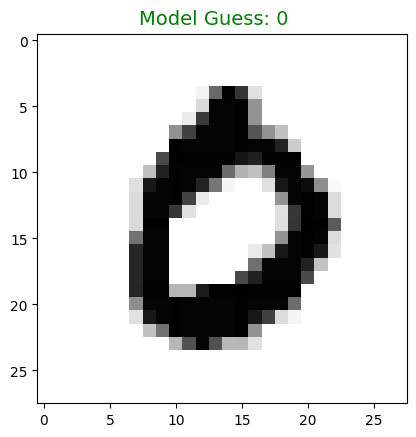

In [ ]:
# User testing
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def predict_single(parameters, image, correct_label):
    # 1. Preprocess the image: Flatten and Normalize
    # Reshape from (28, 28) to (784, 1) and scale to 0-1
    processed_image = image.reshape(784, 1) / 255.0
    
    # 2. Forward Pass using your manual function
    # AL will be the output layer (probabilities for each digit)
    AL, _ = L_model_forward(processed_image, parameters)
    
    # 3. Get the prediction
    prediction_index = np.argmax(AL, axis=0)[0]
    predicted_class = class_names[prediction_index]
    
    # 4. Show the result
    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    # Using a colored text for the prediction to make it stand out
    plt.figtext(0.5, 0.90, f"Model Guess: {guess}", ha='center', fontsize=14, 
                color='green' if label == guess else 'red')
    plt.show()

def get_number():
    while True:
        num = input("Pick a number (0-9999): ")
        if num.isdigit():
            num = int(num)
            if 0 <= num < 10000:
                return num
        print("Try again...")

# --- Execution ---
num = get_number()
image = test_images[num]   # Original 28x28 image for plotting
label = test_labels[num]   # The integer label (0-9)
predict_single(parameters, image, label)